In [1]:
import tensorflow as tf
import keras
import numpy as np
import os
import json
import cv2
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

2024-02-05 22:52:43.032678: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
train_npz_folder = '/raid/mpsych/OMAMA/DATA/data/2d_resized_512/images'

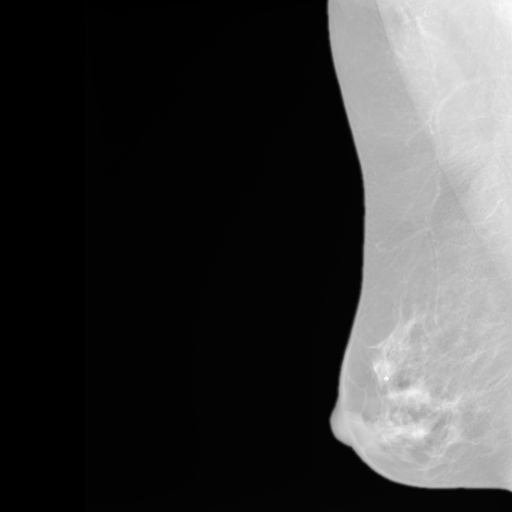

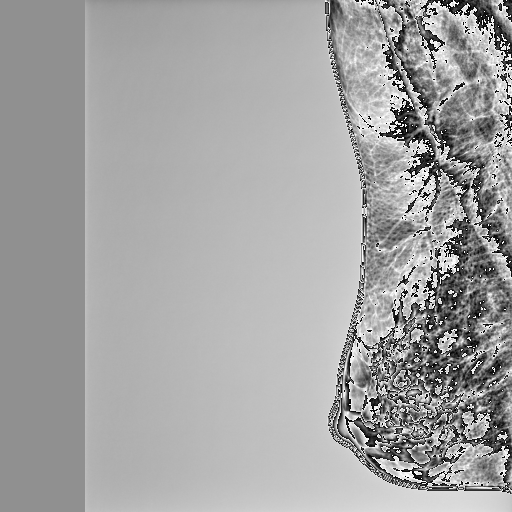

Minimum intensity: 144
Maximum intensity: 3489
shape (512, 512)
Shape of images_array: (512, 512)
Data type of images_array: uint16
Minimum intensity: 0
Maximum intensity: 255


In [115]:
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

npz_filename = '/raid/mpsych/OMAMA/DATA/data/2d_resized_512/images/10195895820725132694762818055891556958.npz'
loaded_data = np.load(npz_filename)
images_array = loaded_data['data']

image_array_3d = np.expand_dims(images_array, axis=-1)
images_array_uint8 = images_array.astype(np.uint8)

img = array_to_img(image_array_3d)
img2 = Image.fromarray(images_array_uint8)

img.show()
img2.show()

min_intensity = np.min(image_array_3d)
max_intensity = np.max(image_array_3d)
shape = images_array.shape

print("Minimum intensity:", min_intensity)
print("Maximum intensity:", max_intensity)
print("shape", shape)
print("Shape of images_array:", images_array.shape)
print("Data type of images_array:", images_array.dtype)
print("Minimum intensity:", np.min(images_array_uint8))
print("Maximum intensity:", np.max(images_array_uint8))

In [110]:
print("Shape of images_array:", images_array.shape)
print("Data type of images_array:", images_array.dtype)

Shape of images_array: (512, 512)
Data type of images_array: uint16


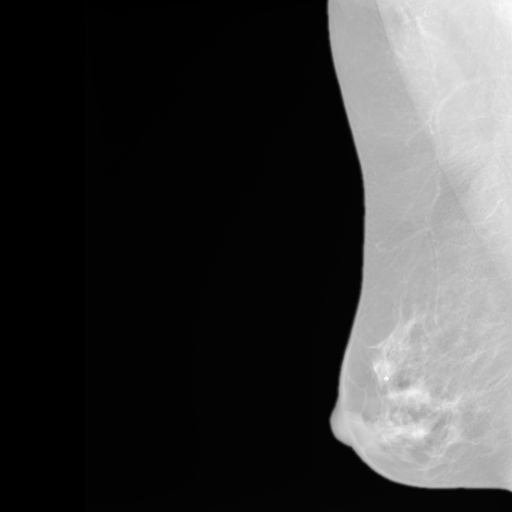

Minimum intensity: 0.0
Maximum intensity: 255.0
Shape: (512, 512, 1)


In [30]:
npz_filename = '/raid/mpsych/OMAMA/DATA/data/2d_resized_512/images/10195895820725132694762818055891556958.npz'
loaded_data = np.load(npz_filename)
images_array = loaded_data['data']

image_array_3d = np.expand_dims(images_array, axis=-1)

# Normalize intensity values to the range [0, 255]
min_intensity = np.min(image_array_3d)
max_intensity = np.max(image_array_3d)
normalized_image = (image_array_3d - min_intensity) / (max_intensity - min_intensity) * 255.0

img = array_to_img(normalized_image)

# Display the normalized image
img.show()

shape = normalized_image.shape

print("Minimum intensity:", np.min(normalized_image))
print("Maximum intensity:", np.max(normalized_image))
print("Shape:", shape)

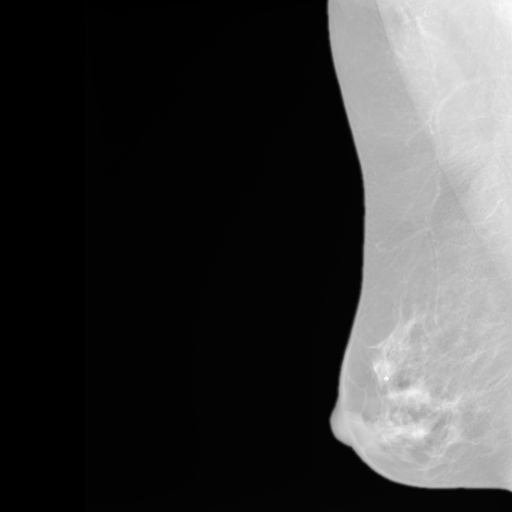

Minimum intensity (after stretching): 0.0
Maximum intensity (after stretching): 255.0
Shape (after stretching): (512, 512, 1)


In [31]:
import numpy as np
from tensorflow.keras.preprocessing.image import array_to_img

def contrast_stretching(image, min_out=0, max_out=255):
    min_in = np.min(image)
    max_in = np.max(image)
    stretched_image = (image - min_in) / (max_in - min_in) * (max_out - min_out) + min_out
    return stretched_image

npz_filename = '/raid/mpsych/OMAMA/DATA/data/2d_resized_512/images/10195895820725132694762818055891556958.npz'
loaded_data = np.load(npz_filename)
images_array = loaded_data['data']

image_array_3d = np.expand_dims(images_array, axis=-1)

# Apply contrast stretching
contrast_stretched_image = contrast_stretching(image_array_3d)

img = array_to_img(contrast_stretched_image)

# Display the image after contrast stretching
img.show()

# Display the statistics after contrast stretching
min_intensity_stretched = np.min(contrast_stretched_image)
max_intensity_stretched = np.max(contrast_stretched_image)
shape_stretched = contrast_stretched_image.shape

print("Minimum intensity (after stretching):", min_intensity_stretched)
print("Maximum intensity (after stretching):", max_intensity_stretched)
print("Shape (after stretching):", shape_stretched)


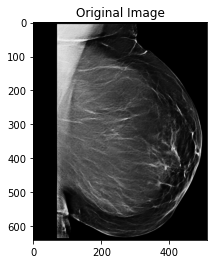

Minimum intensity: 0
Maximum intensity: 255
Contrast: 1.0
Brightness: 127.5
Image shape: (640, 512)
Data type of images_array: uint8


In [112]:
import cv2
import matplotlib.pyplot as plt

img_file = '/raid/mpsych/OMAMA/DATA/data/train/sample_9685.png'
image = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)

# Get the minimum and maximum pixel intensities
min_intensity = image.min()
max_intensity = image.max()

# Calculate contrast and brightness
contrast = (max_intensity - min_intensity) / (max_intensity + min_intensity)
brightness = (max_intensity + min_intensity) / 2

# Display the image using matplotlib
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

# Print information about the image
print("Minimum intensity:", min_intensity)
print("Maximum intensity:", max_intensity)
print("Contrast:", contrast)
print("Brightness:", brightness)
print("Image shape:", image.shape)
print("Data type of images_array:", image.dtype)


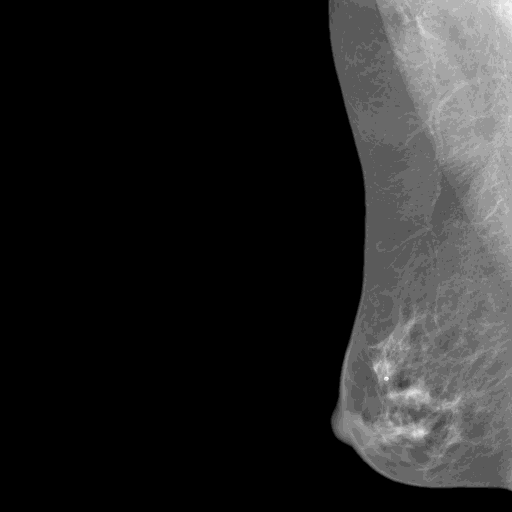

Minimum intensity: 0
Maximum intensity: 17
Shape: (512, 512, 1)


In [58]:
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np
from skimage import exposure

npz_filename = '/raid/mpsych/OMAMA/DATA/data/2d_resized_512/images/10195895820725132694762818055891556958.npz'
loaded_data = np.load(npz_filename)
images_array = loaded_data['data']

image_array_3d = np.expand_dims(images_array, axis=-1)

# Adjust contrast using the exposure module from skimage
contrast_adjusted_image = exposure.adjust_gamma(image_array_3d, gamma=2.8)

# Convert the array to an image
img = array_to_img(contrast_adjusted_image)

# Display the contrast-adjusted image
img.show()

shape = contrast_adjusted_image.shape

print("Minimum intensity:", np.min(contrast_adjusted_image))
print("Maximum intensity:", np.max(contrast_adjusted_image))
print("Shape:", shape)

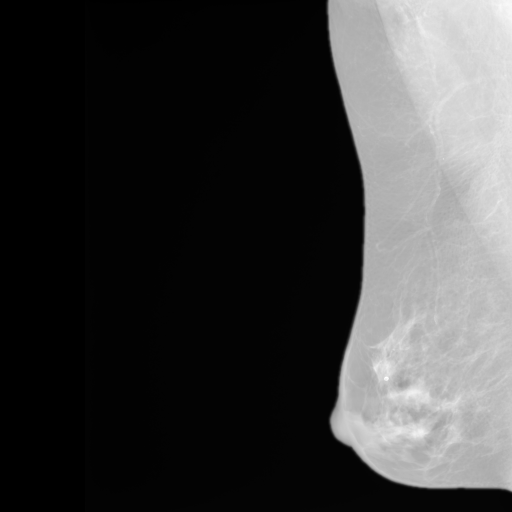

Minimum intensity: 20
Maximum intensity: 254
Shape (512, 512, 1)


In [70]:
import cv2
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

npz_filename = '/raid/mpsych/OMAMA/DATA/data/2d_resized_512/images/10195895820725132694762818055891556958.npz'
loaded_data = np.load(npz_filename)
images_array = loaded_data['data']

image_array_3d = np.expand_dims(images_array, axis=-1)

# Convert 3D array to 2D array for OpenCV
image_array_2d = np.squeeze(image_array_3d)

# Increase contrast using OpenCV
alpha = 0.07 # Contrast factor (adjust as needed)
adjusted_image = cv2.convertScaleAbs(image_array_2d, alpha=alpha, beta=10)

# Convert the adjusted 2D array back to 3D array
adjusted_image_3d = np.expand_dims(adjusted_image, axis=-1)

img = array_to_img(adjusted_image_3d)

# Display the adjusted image
img.show()

min_intensity = np.min(adjusted_image_3d)
max_intensity = np.max(adjusted_image_3d)
shape = adjusted_image_3d.shape

print("Minimum intensity:", min_intensity)
print("Maximum intensity:", max_intensity)
print("Shape", shape)


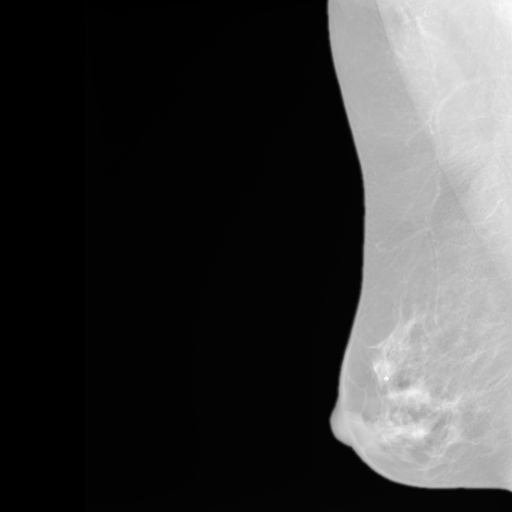

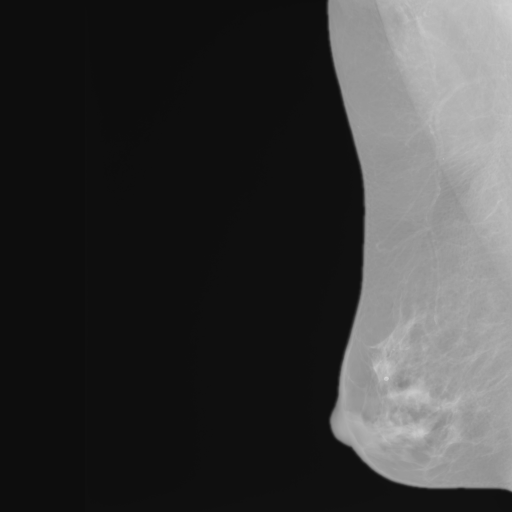

Minimum intensity: 144
Maximum intensity: 3489
Shape: (512, 512, 1)


In [80]:
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np
from PIL import Image, ImageEnhance

npz_filename = '/raid/mpsych/OMAMA/DATA/data/2d_resized_512/images/10195895820725132694762818055891556958.npz'
loaded_data = np.load(npz_filename)
images_array = loaded_data['data']

image_array_3d = np.expand_dims(images_array, axis=-1)

# Convert the NumPy array to a PIL Image
img = array_to_img(image_array_3d)

# Display the original image
img.show()

# Enhance the contrast of the image
enhancer = ImageEnhance.Contrast(img)
factor = 0.78
contrast_image = enhancer.enhance(factor)

# Display the contrast-adjusted image
contrast_image.show()

# Get information about the images
min_intensity = np.min(image_array_3d)
max_intensity = np.max(image_array_3d)
shape = image_array_3d.shape

print("Minimum intensity:", min_intensity)
print("Maximum intensity:", max_intensity)
print("Shape:", shape)


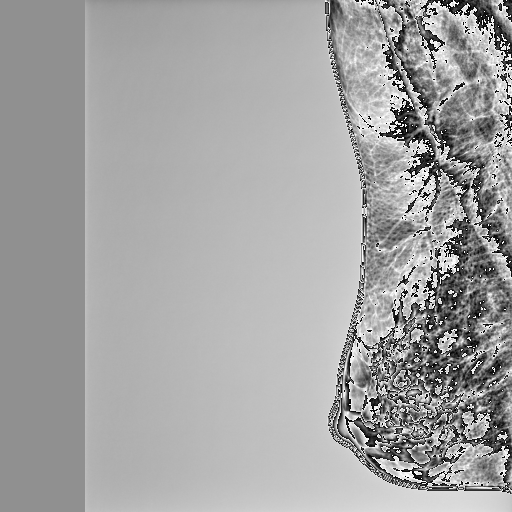

In [101]:
from PIL import Image
import numpy as np

# Load NPZ file
npz_filename = '/raid/mpsych/OMAMA/DATA/data/2d_resized_512/images/10195895820725132694762818055891556958.npz'
loaded_data = np.load(npz_filename)
images_array = loaded_data['data']

img = Image.fromarray(images_array.astype('uint8'))

img.show()

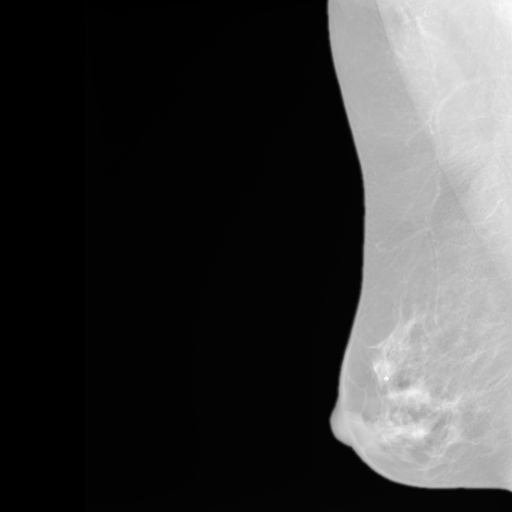

In [102]:
from PIL import Image
import numpy as np

# Load NPZ file
npz_filename = '/raid/mpsych/OMAMA/DATA/data/2d_resized_512/images/10195895820725132694762818055891556958.npz'
loaded_data = np.load(npz_filename)
images_array = loaded_data['data']

# Ensure the pixel values are in the correct range [0, 255]
min_intensity = np.min(images_array)
max_intensity = np.max(images_array)
normalized_images_array = ((images_array - min_intensity) / (max_intensity - min_intensity)) * 255.0

# Convert to uint8
normalized_images_array = normalized_images_array.astype('uint8')

# Create a PIL Image from the 2D NumPy array
img = Image.fromarray(normalized_images_array)

# Display the image
img.show()


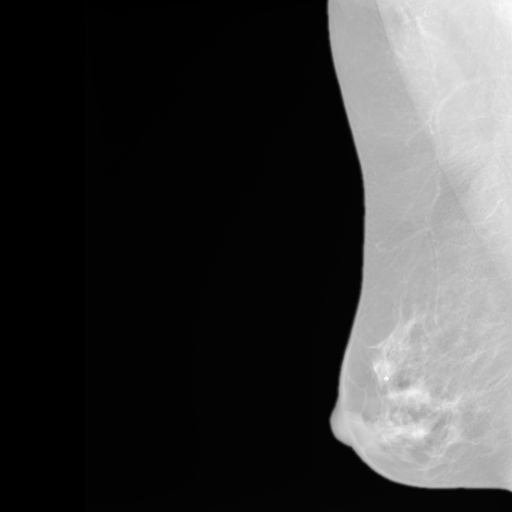

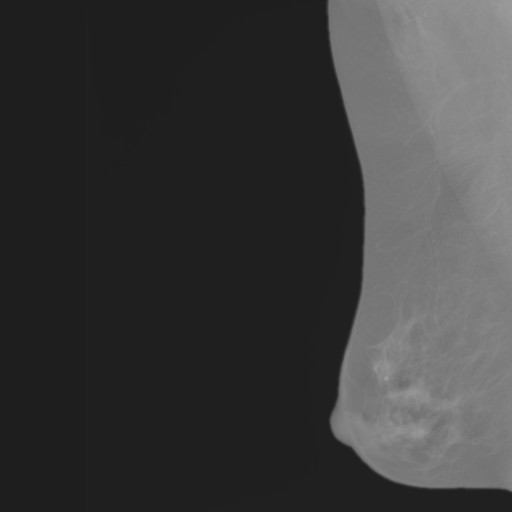

In [108]:
from PIL import Image, ImageEnhance
import numpy as np

# Load NPZ file
npz_filename = '/raid/mpsych/OMAMA/DATA/data/2d_resized_512/images/10195895820725132694762818055891556958.npz'
loaded_data = np.load(npz_filename)
images_array = loaded_data['data']

# Ensure the pixel values are in the correct range [0, 255]
min_intensity = np.min(images_array)
max_intensity = np.max(images_array)
normalized_images_array = ((images_array - min_intensity) / (max_intensity - min_intensity)) * 255.0

# Convert to uint8
normalized_images_array = normalized_images_array.astype('uint8')

# Create a PIL Image from the 2D NumPy array
img = Image.fromarray(normalized_images_array)

# Adjust contrast and brightness
enhancer = ImageEnhance.Contrast(img)
contrast_factor = 0.5  # You can adjust this factor as needed
img_with_contrast = enhancer.enhance(contrast_factor)

brightness_factor = 1.0  # You can adjust this factor as needed
img_with_brightness = ImageEnhance.Brightness(img_with_contrast).enhance(brightness_factor)

# Display the original and adjusted images
img.show(title='Original Image')
img_with_brightness.show(title='Image with Contrast and Brightness Adjusted')
